# **Do Ly Anh Kiet - 2274802010451**


---



# **LAB05 - TỔNG HỢP**

1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả.


> https://archive.ics.uci.edu/dataset/186/wine+quality



In [35]:
import pandas as pd
from tabulate import tabulate
import requests

# Tải dữ liệu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
response = requests.get(url)

# Ghi nội dung vào một file CSV
with open('winequality-red.csv', 'wb') as file:
    file.write(response.content)

# 1.1 Đọc dữ liệu
file_path = "winequality-red.csv"
# 1.2 Đọc lại dữ liệu với dấu phân cách ';'
df = pd.read_csv(file_path, sep=';')

# 1.3 Hiển thị 5 dòng đầu tiên của dữ liệu
head = df.head()

# 1.4 Lấy thông tin về dữ liệu
info_str = df.info()
info = df.info(buf=None)

# 1.5 Thống kê mô tả
describe = df.describe()

print("5 Dòng đầu tiên của dữ liệu:")
print(tabulate(head, headers="keys", tablefmt="grid"))

print("\nThông tin về dữ liệu:")
print(info_str)

print("\nThống kê mô tả:")
print(tabulate(describe, headers="keys", tablefmt="grid"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

2. Phân tích khám phá dữ liệu



In [36]:
# 2.1 Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
missing_values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


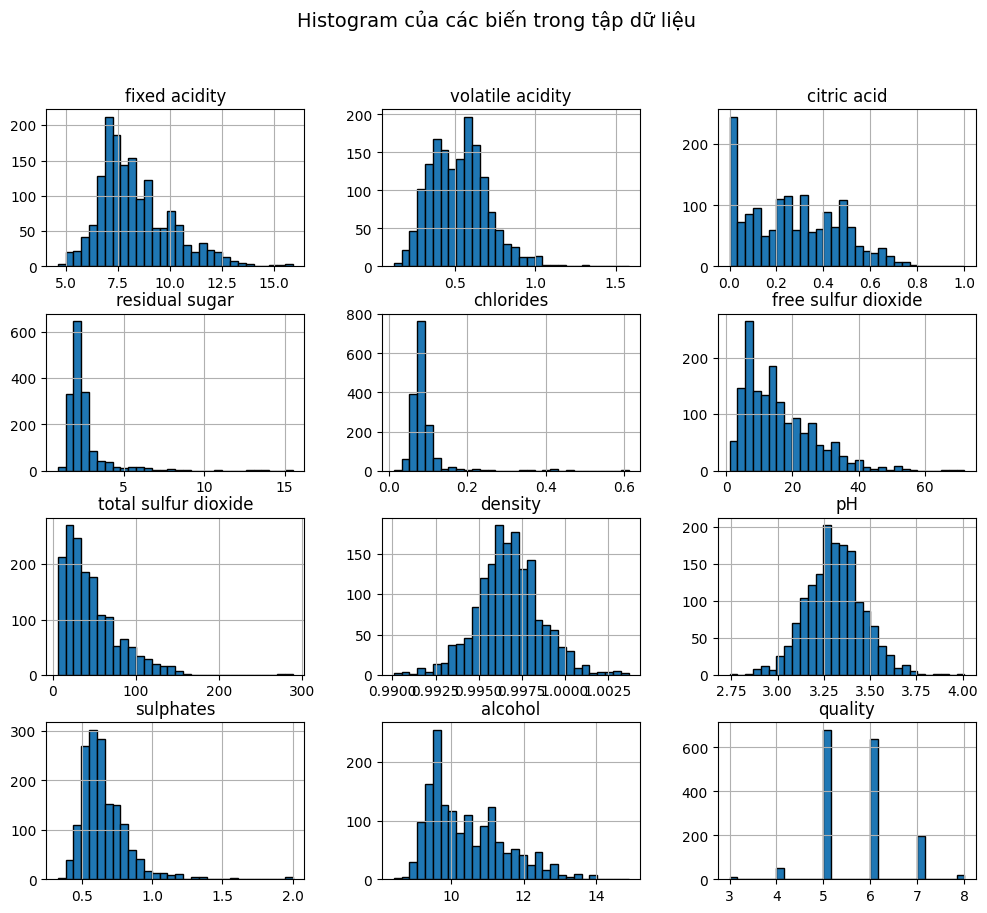

Nhận xét: Histogram cho thấy phân phối của các biến trong tập dữ liệu. Một số biến có phân phối lệch phải, chẳng hạn như 'residual sugar' và 'alcohol'.
Điều này có thể ảnh hưởng đến mô hình dự đoán và có thể cần chuẩn hóa dữ liệu trước khi huấn luyện mô hình.


In [37]:
# 2.2 Vẽ histogram cho tất cả các biến và nhận xét.
import matplotlib.pyplot as plt

# Vẽ histogram cho tất cả các biến
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histogram của các biến trong tập dữ liệu", fontsize=14)
plt.show()

# Nhận xét về Histogram:
print("Nhận xét: Histogram cho thấy phân phối của các biến trong tập dữ liệu. Một số biến có phân phối lệch phải, chẳng hạn như 'residual sugar' và 'alcohol'.")
print("Điều này có thể ảnh hưởng đến mô hình dự đoán và có thể cần chuẩn hóa dữ liệu trước khi huấn luyện mô hình.")


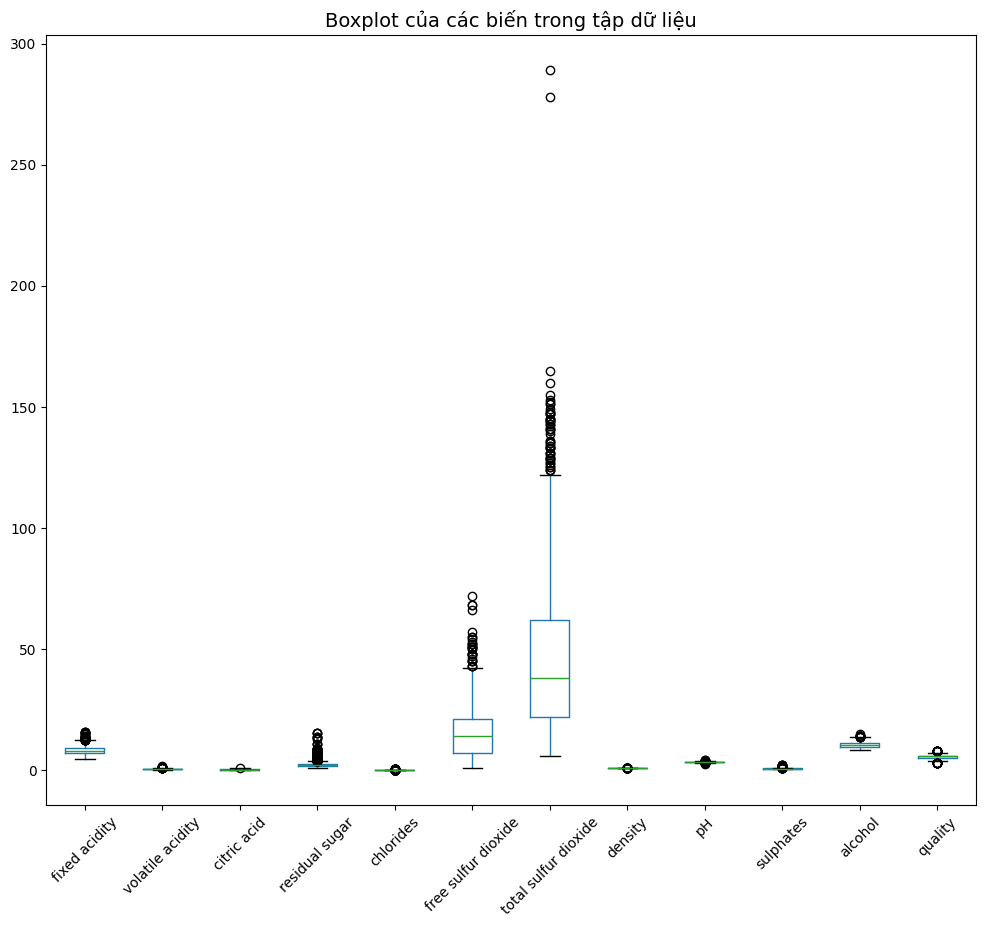

Nhận xét: Boxplot cho thấy một số biến có giá trị ngoại lai đáng kể, đặc biệt là 'volatile acidity' và 'residual sugar'.
Những điểm ngoại lai này có thể ảnh hưởng đến mô hình và có thể cần xử lý trước khi huấn luyện.


In [38]:
# 2.3 Vẽ boxlot cho tất cả các biến và nhận xét.
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho tất cả các biến
plt.figure(figsize=(12, 10))
df.boxplot(rot=45, grid=False)
plt.title("Boxplot của các biến trong tập dữ liệu", fontsize=14)
plt.show()

# Nhận xét về Boxplot:
print("Nhận xét: Boxplot cho thấy một số biến có giá trị ngoại lai đáng kể, đặc biệt là 'volatile acidity' và 'residual sugar'.")
print("Những điểm ngoại lai này có thể ảnh hưởng đến mô hình và có thể cần xử lý trước khi huấn luyện.")


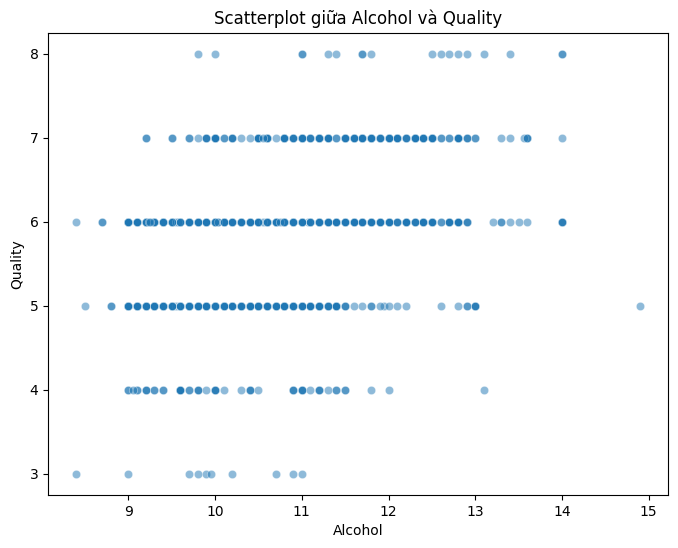

In [39]:
# 2.4 Vẽ scatterplot cho "ancohol" và "quality".
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["alcohol"], y=df["quality"], alpha=0.5)
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Scatterplot giữa Alcohol và Quality")
plt.show()



3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan.

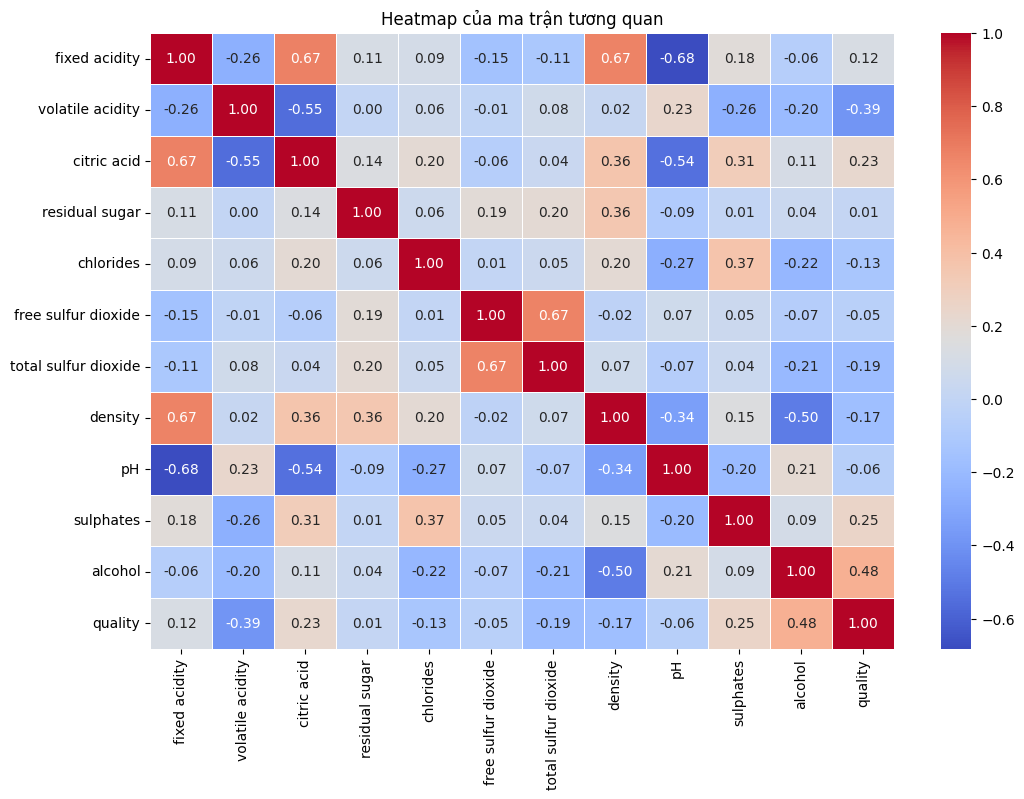

In [40]:
# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap của ma trận tương quan")
plt.show()


4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn.

In [41]:
import numpy as np

# 4.1 Xáo trộn dữ liệu
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 4.2 Chia dữ liệu theo tỉ lệ 80% train, 20% test
split_index = int(0.8 * len(df_shuffled))
train_data = df_shuffled[:split_index]
test_data = df_shuffled[split_index:]


5. Chuẩn bị dữ liệu

In [42]:
# 5.1 Tách đặc trưng và nhãn
X_train, y_train = train_data.drop(columns=["quality"]), train_data["quality"]
X_test, y_test = test_data.drop(columns=["quality"]), test_data["quality"]

# 5.2 Kích thước tập dữ liệu sau khi chia
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 5.3 Chuẩn hóa dữ liệu bằng Min-Max Scaling
X_min = X_train.min()
X_max = X_train.max()

# Áp dụng chuẩn hóa cho tập huấn luyện và kiểm tra
X_train_scaled = (X_train - X_min) / (X_max - X_min)
X_test_scaled = (X_test - X_min) / (X_max - X_min)

# Kiểm tra kết quả sau chuẩn hóa
X_train_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,0.329551,0.278712,0.341703,0.111715,0.126633,0.208135,0.142622,0.491396,0.391814,0.198356,0.307189
std,0.155190,0.123534,0.242656,0.098920,0.080381,0.146668,0.116939,0.140181,0.135005,0.099977,0.164348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.126582,0.068493,0.096828,0.084507,0.056537,0.406021,0.304348,0.133333,0.169231
50%,0.292035,0.273973,0.316456,0.089041,0.111853,0.169014,0.109541,0.491189,0.391304,0.175758,0.261538
75%,0.407080,0.354452,0.531646,0.116438,0.131886,0.281690,0.197880,0.569383,0.469565,0.242424,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


6. Ứng dụng mô hình hồi quy tuyến tính.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 6.1 Khởi tạo
model = LinearRegression()

# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

# 6.3. Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Hiển thị 5 giá trị dự đoán đầu tiên
print("\n5 giá trị dự đoán đầu tiên:", y_pred[:5])

# 8. Đánh giá mô hình
# Tính Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)

# Tính R^2 Score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# 9. Nhận xét về kết quả đánh giá
if r2 < 0:
    print("Mô hình không phù hợp với dữ liệu.")
elif r2 < 0.5:
    print("Mô hình có sự phù hợp yếu với dữ liệu.")
elif r2 < 0.75:
    print("Mô hình có sự phù hợp tốt với dữ liệu.")
else:
    print("Mô hình có sự phù hợp xuất sắc với dữ liệu.")

# 10. Cải thiện độ chính xác bằng RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, y_rf_pred)
print("\nRandomForestRegressor R^2 Score:", rf_r2)


5 giá trị dự đoán đầu tiên: [6.05848455 5.5490091  5.3496577  5.42258039 5.88654498]

Mean Squared Error (MSE): 0.3500817859850651
R^2 Score: 0.42239664080834827
Mô hình có sự phù hợp yếu với dữ liệu.

RandomForestRegressor R^2 Score: 0.4980170146945089


# **BÀI TẬP VỀ NHÀ**

# 📊 **Bài tập xử lý dữ liệu: How Long We Live**
## 1. Hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt và chính xác. Đã hoàn thành ✅
## 2.1 Kiểm tra số hàng và số cột của bộ dữ liệu
- Xác định số lượng hàng (records) và số lượng cột (features).

## 2.2 Danh sách các cột trong dataset
- In ra danh sách tên tất cả các cột trong bộ dữ liệu.

## 2.3 Thử truy cập cột `"Status"`
- Truy xuất cột `"Status"` để kiểm tra giá trị.

## 2.4 Đếm số lượng quốc gia theo trạng thái phát triển
- Xác định có bao nhiêu quốc gia đang phát triển (`"Developing"`) và bao nhiêu quốc gia phát triển (`"Developed"`).

## 2.5 Thống kê dữ liệu cột `"Alcohol"`
- Tính toán:
  - Giá trị **nhỏ nhất** (`min`)
  - Giá trị **lớn nhất** (`max`)
  - Giá trị **trung bình** (`mean`)
  - Giá trị **trung vị** (`median`)

## 2.6 Phân tích dữ liệu nâng cao

### 2.6.1 Các quốc gia có mức tiêu thụ rượu cao
- Đếm số lượng quốc gia có mức tiêu thụ rượu (`Alcohol`) **cao hơn mức trung bình**.
- Liệt kê **danh sách các quốc gia độc đáo** trong nhóm này.

### 2.6.2 Các quốc gia có trình độ học vấn và GDP cao
- Lọc danh sách các quốc gia có **trình độ học vấn (`Schooling`) cao hơn mức trung bình**.
- Đồng thời, GDP (`GDP`) của quốc gia đó cũng **cao hơn mức trung bình**.
- Liệt kê danh sách các quốc gia này.

---


In [47]:
import pandas as pd

# Tải dữ liệu trực tiếp từ GitHub
url = "https://raw.githubusercontent.com/cartocat/datasets/main/howlongwelive.csv"
df = pd.read_csv(url)

# Xóa khoảng trắng thừa trong tên cột để tránh lỗi KeyError
df.columns = df.columns.str.strip()

# 2.1 Số hàng và số cột
num_rows, num_cols = df.shape
print("="*50)
print(f"📊 Tổng số hàng: {num_rows} | Tổng số cột: {num_cols}")
print("="*50)

# 2.2 Danh sách tên các cột
columns_list = [[col] for col in df.columns]
print("\n📝 Danh sách các cột:")
print(tabulate(columns_list, headers=["Tên Cột"], tablefmt="grid"))

# 2.3 Thử dùng df["Status"]
print("\n🔍 Giá trị đầu tiên của cột 'Status':", df["Status"].iloc[0])

# 2.4 Đếm số nước phát triển và đang phát triển
num_developing = (df["Status"] == "Developing").sum()
num_developed = (df["Status"] == "Developed").sum()
print("\n🌍 Phân loại quốc gia:")
print(f" - 🌱 Số nước đang phát triển: {num_developing}")
print(f" - 🌍 Số nước phát triển: {num_developed}")

# 2.5 Thống kê cột Alcohol (tiêu thụ rượu)
alcohol_stats = {
    "Min": df["Alcohol"].min(),
    "Max": df["Alcohol"].max(),
    "Mean": df["Alcohol"].mean(),
    "Median": df["Alcohol"].median()
}
print("\n🍷 Thống kê mức tiêu thụ rượu:")
for key, value in alcohol_stats.items():
    print(f" - {key}: {value:.2f}")

# 2.6.1 Đếm số hàng có rượu nhiều hơn mức trung bình và liệt kê quốc gia duy nhất
alcohol_mean = df["Alcohol"].mean()
high_alcohol_countries = df[df["Alcohol"] > alcohol_mean]["Country"].unique()
print("\n📌 Các nước có mức tiêu thụ rượu cao hơn trung bình:")
print(f" - Tổng số: {len(high_alcohol_countries)} quốc gia")
print(" - Danh sách: ", ", ".join(high_alcohol_countries[:10]), "...")  # Hiển thị 10 quốc gia đầu tiên

# 2.6.2 Danh sách quốc gia có trình độ học vấn và GDP cao hơn mức trung bình
education_mean = df["Schooling"].mean()
gdp_mean = df["GDP"].mean()
high_edu_gdp_countries = df[(df["Schooling"] > education_mean) & (df["GDP"] > gdp_mean)]["Country"].unique()

print("\n📚 Các nước có trình độ học vấn và GDP cao hơn mức trung bình:")
print(f" - Tổng số: {len(high_edu_gdp_countries)} quốc gia")
print(" - Danh sách: ", ", ".join(high_edu_gdp_countries[:10]), "...")  # Hiển thị 10 quốc gia đầu tiên

📊 Tổng số hàng: 2938 | Tổng số cột: 22

📝 Danh sách các cột:
+---------------------------------+
| Tên Cột                         |
+=================================+
| Country                         |
+---------------------------------+
| Year                            |
+---------------------------------+
| Status                          |
+---------------------------------+
| Life expectancy                 |
+---------------------------------+
| Adult Mortality                 |
+---------------------------------+
| infant deaths                   |
+---------------------------------+
| Alcohol                         |
+---------------------------------+
| percentage expenditure          |
+---------------------------------+
| Hepatitis B                     |
+---------------------------------+
| Measles                         |
+---------------------------------+
| BMI                             |
+---------------------------------+
| under-five deaths               |
+--